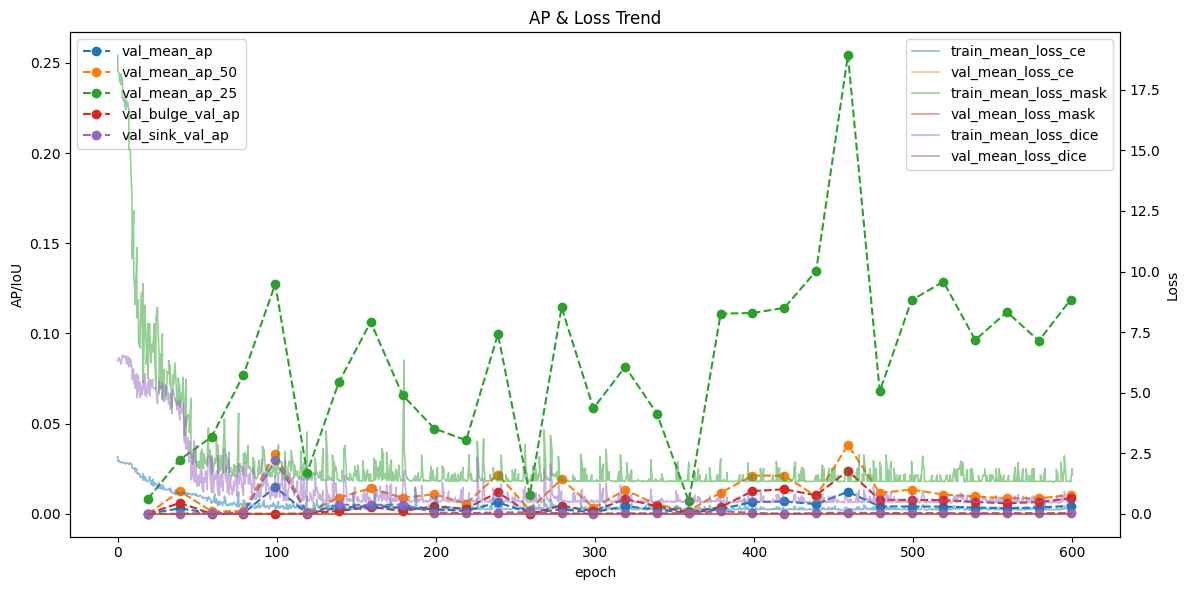

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. 设置实验目录（包含 metrics.csv 的目录）
exp_dir = "./saved/real3dad_exp1/real3dad_exp1/version_0"  # 修改为你的路径

metrics_path = os.path.join(exp_dir, "metrics.csv")
assert os.path.exists(metrics_path), f"找不到 {metrics_path}"

# 2. 加载数据
df = pd.read_csv(metrics_path)

# 3. 指定你关心的可视化指标（自动筛选所有AP、loss相关列）
key_metrics = [col for col in df.columns if "ap" in col or "loss" in col]
show_metrics = [
    "val_mean_ap", "val_mean_ap_50", "val_mean_ap_25", 
    "val_bulge_val_ap", "val_sink_val_ap",
    "train_mean_loss_ce", "val_mean_loss_ce", 
    "train_mean_loss_mask", "val_mean_loss_mask", 
    "train_mean_loss_dice", "val_mean_loss_dice"
]
# 若列不存在则自动过滤
show_metrics = [m for m in show_metrics if m in df.columns]

# 4. 绘图（AP指标/损失分开Y轴，支持步进或epoch横轴，自动去除全NaN列）
fig, ax1 = plt.subplots(figsize=(12, 6))

# X轴：优先 epoch，没有则用 step
x_axis = "epoch" if "epoch" in df.columns else "step"
x = df[x_axis]

# AP相关
ap_cols = [m for m in show_metrics if "ap" in m]
for col in ap_cols:
    valid_data = df[[x_axis, col]].dropna()
    if not valid_data.empty:
        ax1.plot(valid_data[x_axis], valid_data[col], marker='o', linestyle='--', linewidth=1.5, label=col)
ax1.set_xlabel(x_axis)
ax1.set_ylabel("AP/IoU")
ax1.legend(loc="upper left")
ax1.set_title("AP & Loss Trend")

# Loss相关副轴
ax2 = ax1.twinx()
loss_cols = [m for m in show_metrics if "loss" in m]
for col in loss_cols:
    valid_data = df[[x_axis, col]].dropna()
    if not valid_data.empty:
        ax2.plot(valid_data[x_axis], valid_data[col], linestyle='-', alpha=0.5, linewidth=1.2, label=col)
ax2.set_ylabel("Loss")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

## 验证脚本
```
# 训练集 515
python main_instance_segmentation.py \
    general.checkpoint=saved/real3dad_exp1/last-epoch.ckpt \
    general.train_mode=false \
    data.test_mode=train \
    data.validation_mode=train \
    data.test_collation.mode=val

# 测试集 83
python main_instance_segmentation.py \
    general.checkpoint=saved/real3dad_exp1/last-epoch.ckpt \
    general.train_mode=false  \
    data.test_mode=test \
    data.validation_mode=test

# 验证集 51
python main_instance_segmentation.py \
    general.checkpoint=saved/real3dad_exp1/last-epoch.ckpt \
    general.train_mode=false \
    data.validation_mode=val
```

## 安装notebook可视化所需库

```bash
sudo apt-get update && sudo apt-get install -y --no-install-recommends \
    libx11-6 \
    libxext6 \
    libxi6 \
    libxrandr2 \
    libxinerama1 \
    libxrender1 \
    libxfixes3 \
    libxcursor1 \
    libxkbcommon0 \
    libgl1 \
    libgl1-mesa-glx \
    libxxf86vm1 \
    libsm6 \
    libice6 \
	libegl1 \
    wget \
    ca-certificates \
    libc-bin
```

In [ ]:
import open3d as o3d
import numpy as np

with open("out/demo_pred.pcd") as f:
    lines = f.readlines()
data_start = next(i for i, l in enumerate(lines) if l.startswith("DATA")) + 1
data = np.loadtxt(lines[data_start:])
points = data[:, :3]
labels = data[:, 3].astype(int)

# 按标签分配颜色
colors = np.zeros((len(labels), 3))
colors[labels == 0] = [0.6, 0.6, 0.6]
colors[labels == 1] = [1.0, 0, 0]
colors[labels == 2] = [0, 0, 1.0]

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_plotly([pcd], width=600, height=400)

In [ ]:

with open("out/demo_pred.pcd") as f:
    lines = f.readlines()
data_start = next(i for i, l in enumerate(lines) if l.startswith("DATA")) + 1
data = np.loadtxt(lines[data_start:])
points = data[:, :3]
labels = data[:, 3].astype(int)

# 按标签分配颜色
colors = np.zeros((len(labels), 3))
colors[labels == 0] = [0.6, 0.6, 0.6]
colors[labels == 1] = [1.0, 0, 0]
colors[labels == 2] = [0, 0, 1.0]

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_plotly([pcd], width=600, height=400)